In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LogNorm
from matplotlib.transforms import ScaledTranslation
from matplotlib import ticker

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import cmocean

In [2]:
def setup_axes(ax):
    ax.add_feature(cfeature.LAND, facecolor='lightgrey', zorder=2)
    ax.coastlines(resolution='110m', color='black', lw=2)
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')


def label_ax(ax, label, position='top', fontsize=16):
    if position == 'inside':
        ax.annotate(
            label,
            xy=(0, 1), xycoords='axes fraction',
            xytext=(+0.5, -0.5), textcoords='offset fontsize',
            fontsize=fontsize, verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='1.', edgecolor='k', pad=3.0))
    elif position == 'top':
        ax.text(
            0.0, 1.0, label, transform=(
                ax.transAxes + ScaledTranslation(7/72, +3/72, fig.dpi_scale_trans)),
            fontsize=fontsize, va='bottom', fontfamily='sans-serif')

# Load Data

In [3]:
data_fold = '../final_data'
ds_attrs_loc = xr.open_dataset(f'{data_fold}/location_attrs.nc')
ds_attrs_ratio = xr.open_dataset(f'{data_fold}/ratio_attrs.nc')
ds = xr.open_dataset(f'{data_fold}/leadtime_attrs.nc')

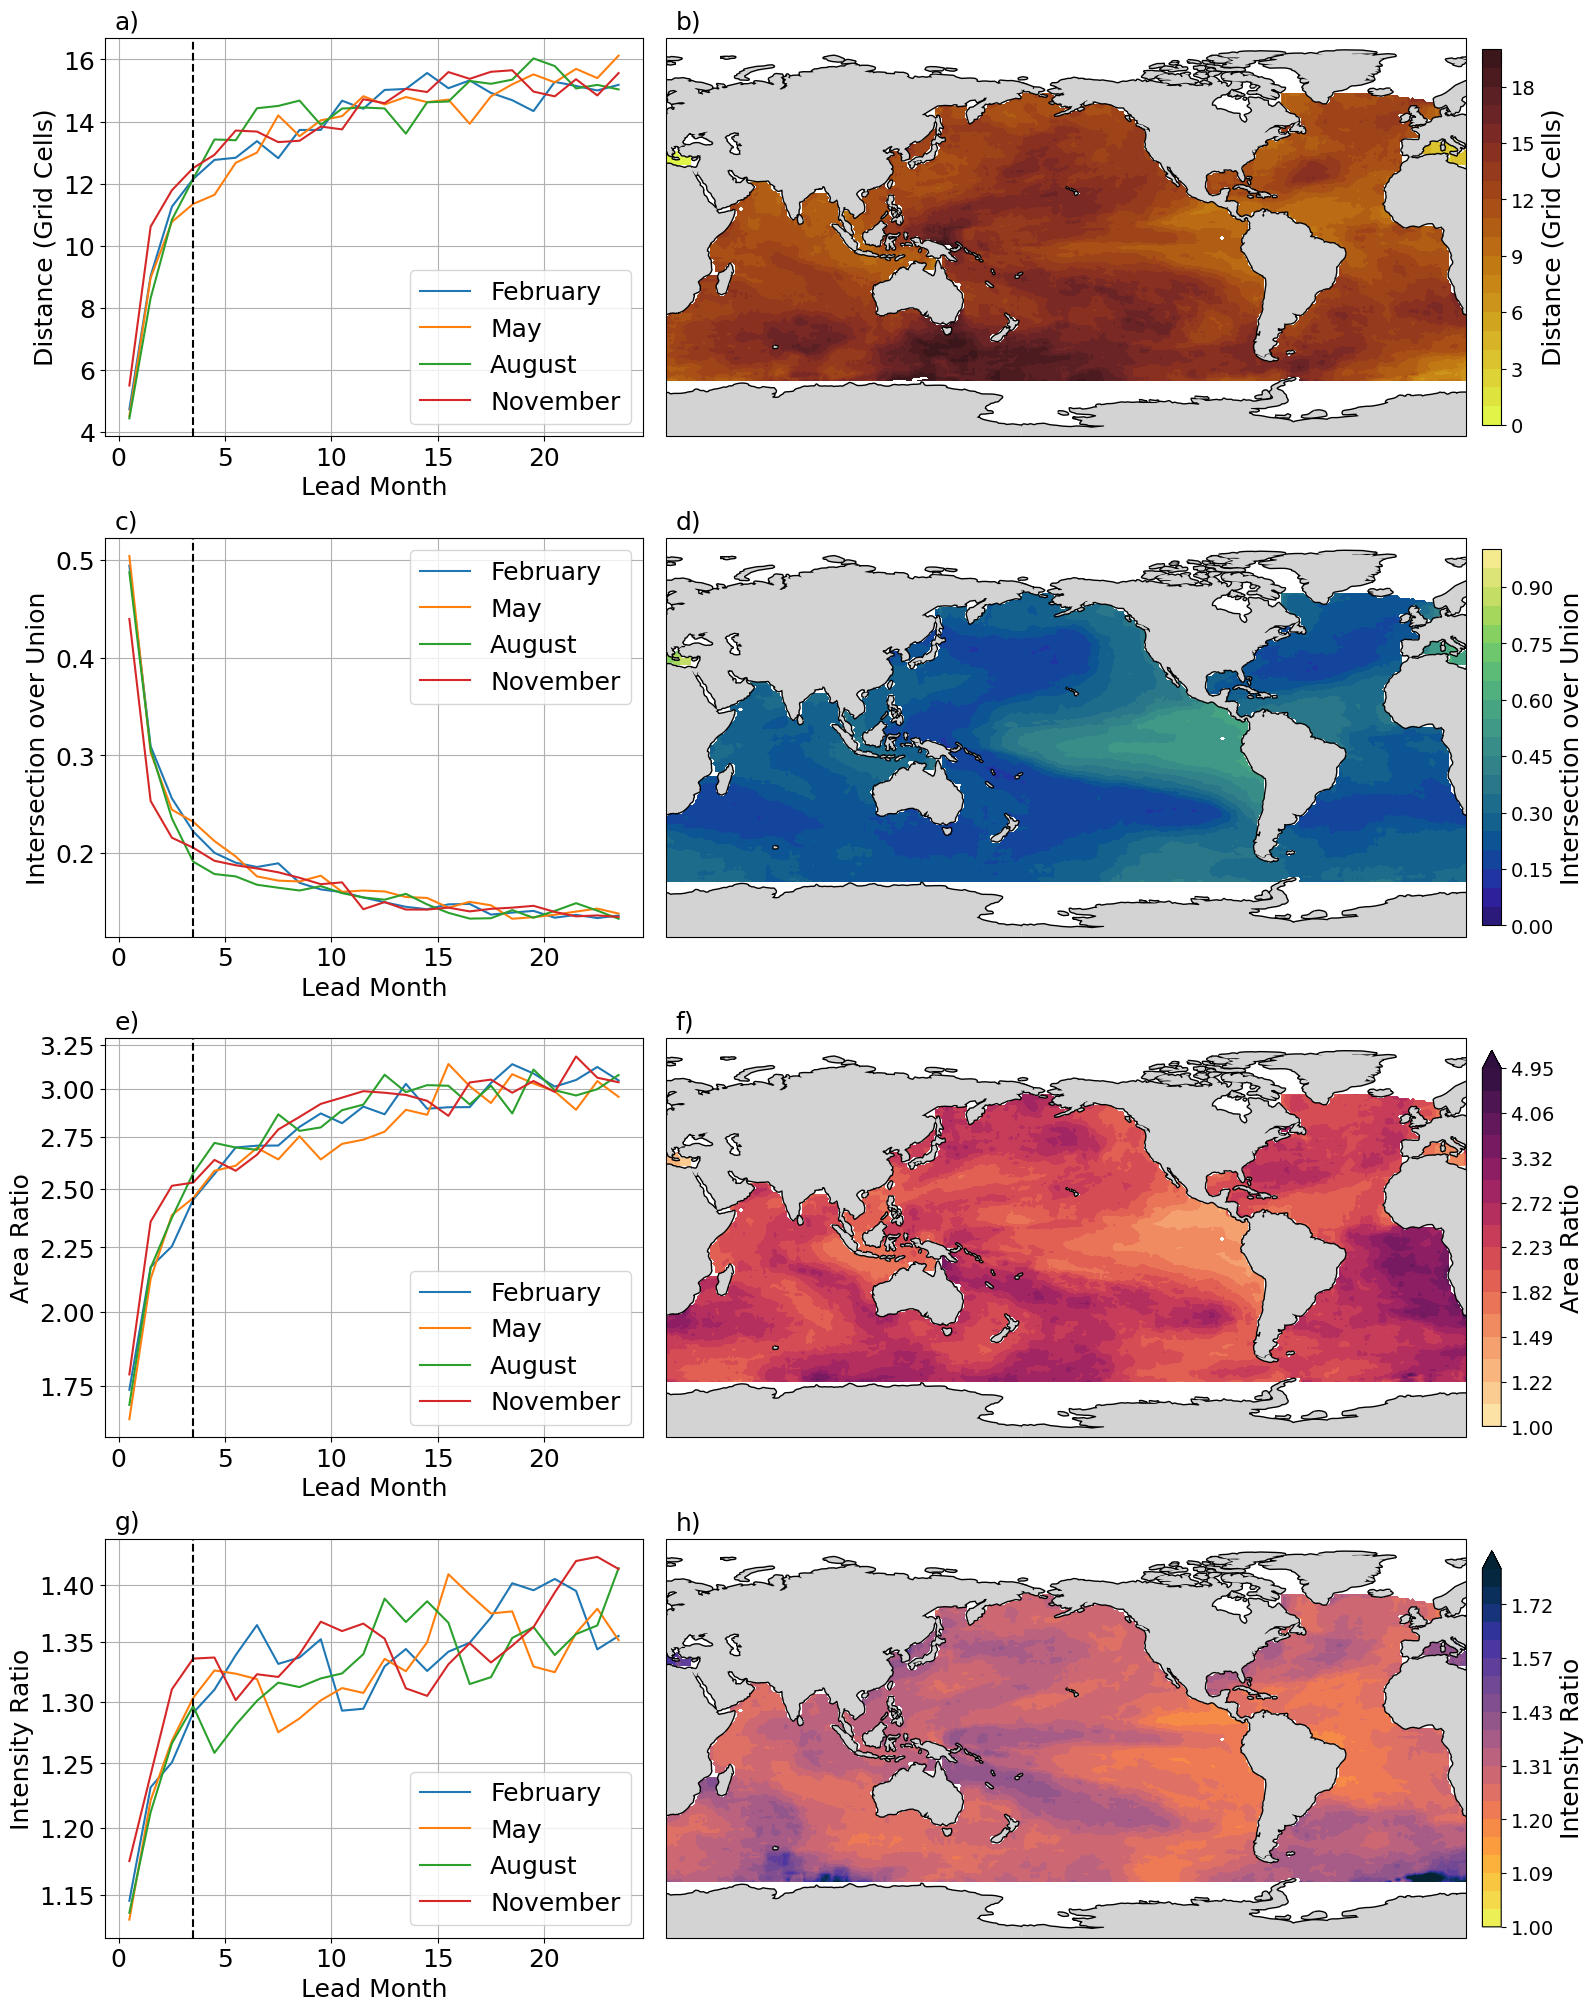

In [5]:
LEAD = 3

colors = plt.cm.tab10
month_names = ['February', 'May', 'August', 'November']
data = [
    ds['CENTROID_DIST'],
    ds['INTERSECTION_OVER_UNION'],
    np.exp(ds['ABS_LOG_AREA_RATIO']),
    np.exp(ds['ABS_LOG_INTENSITY_50_RATIO'])
]
data1 = [
    ds_attrs_loc['CENTROID_DIST'].sel(lead=LEAD).mean('month'),
    ds_attrs_loc['INTERSECTION_OVER_UNION'].sel(lead=LEAD).mean('month'),
    np.exp(ds_attrs_ratio['ABS_LOG_AREA_RATIO'].sel(lead=LEAD).mean('month')),
    np.exp(ds_attrs_ratio['ABS_LOG_INTENSITY_50_RATIO'].sel(lead=LEAD).mean('month'))
]
ylabels = ['Distance (Grid Cells)', 'Intersection over Union', 'Area Ratio', 'Intensity Ratio']
clabels = ylabels
labels_left = ['a)', 'c)', 'e)', 'g)']
labels_right = ['b)', 'd)', 'f)', 'h)']
cmaps = [cmocean.cm.solar_r, cmocean.cm.haline, cmocean.cm.matter, cmocean.cm.thermal_r]
levs_vals = [np.arange(21), np.linspace(0, 1, 21), np.exp(np.linspace(0, 1.6, 17)), np.exp(np.linspace(0, 0.6, 21))]
extends = [None, None, 'max', 'max']
norms = [None, None, LogNorm(), LogNorm()]
formatter = [None, None, ticker.FormatStrFormatter('%.2f'), ticker.FormatStrFormatter('%.2f')]
ticks2 = np.linspace(1.75, 3.25, 7)
ticks3 = np.linspace(1.15, 1.4, 6)

label_pos = 'top'
textsize=18
labelsize = 18
cbarnumbersize = 14
cbartextsize = 18

fig, axs = plt.subplots(4, 2, figsize=(16, 20), width_ratios=[1, 1.5], layout='compressed')

for i in range(4):
    for j in range(4):
        axs[i, 0].plot(np.arange(0, 24)+0.5, data[i].isel(month=j), label=month_names[j], c=colors(j))
    axs[i, 0].set_xlabel('Lead Month', fontsize=textsize)
    axs[i, 0].set_ylabel(ylabels[i], fontsize=textsize)
    axs[i, 0].tick_params(labelsize=textsize)
    axs[i, 0].grid()
    axs[i, 0].axvline(3.5, c='k', ls='--')
    label_ax(axs[i, 0], labels_left[i], 'top', fontsize=labelsize)

    axs[i, 1].remove()
    ax = fig.add_subplot(4, 2, 2*i+2, projection=ccrs.PlateCarree(200))
    setup_axes(ax)
    im = ax.contourf(data1[i].lon, data1[i].lat, data1[i], transform=ccrs.PlateCarree(), cmap=cmaps[i], levels=levs_vals[i], extend=extends[i], norm=norms[i])
    cbar = plt.colorbar(im, ax=ax, fraction=0.0233, pad=0.02, format=formatter[i])
    cbar.set_label(label=clabels[i], size=cbartextsize)
    cbar.ax.tick_params(labelsize=cbarnumbersize)
    label_ax(ax, labels_right[i], label_pos, fontsize=labelsize)

axs[2, 0].set_yscale('log')
axs[3, 0].set_yscale('log')
axs[2, 0].set_yticks(ticks2, labels=[f'{t:.2f}' for t in ticks2])
axs[3, 0].set_yticks(ticks3, labels=[f'{t:.2f}' for t in ticks3])

axs[0, 0].legend(loc=4, fontsize=textsize)
axs[1, 0].legend(loc=1, fontsize=textsize)
axs[2, 0].legend(loc=4, fontsize=textsize)
axs[3, 0].legend(loc=4, fontsize=textsize)
# plt.tight_layout()
plt.show()